In [ ]:
# 🧩 TASK: Exploratory Data Analysis (EDA)

## Step 1: Asking Meaningful Questions

Before analyzing the dataset, it’s important to define what we want to learn.

### Key Questions:
1.What is the structure and size of the dataset?
2.Are there missing or duplicate records?
3.What are the distributions of numerical variables (Weekly_Sales, Temperature, Fuel_Price, CPI, Unemployment)?
4.How do sales vary across different stores?
5.Do holiday weeks have higher average sales than non-holiday weeks?
6.Are there correlations between Weekly_Sales and factors like Temperature, Fuel_Price, CPI, and Unemployment?
7.What trends can be observed in Weekly_Sales over time?
8.Are there any outliers or anomalies in the sales data?
9.How does economic variation (CPI or Unemployment) affect weekly sales trends?

# ✅ Purpose: These questions guide our analysis to identify patterns, relationships, and key drivers of Walmart’s weekly sales.


In [17]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r"C:\Users\hp\Downloads\Walmart_Sales.csv")

# Display first few rows
df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.57,211.10,8.11
1,1,12-02-2010,1641957.44,1,38.51,2.55,211.24,8.11
2,1,19-02-2010,1611968.17,0,39.93,2.51,211.29,8.11
3,1,26-02-2010,1409727.59,0,46.63,2.56,211.32,8.11
4,1,05-03-2010,1554806.68,0,46.50,2.62,211.35,8.11


In [4]:
#initial exploration
print(df.shape)
df.info()
df.describe()

(6435, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00
mean,23.00,1046964.88,0.07,60.66,3.36,171.58,8.00
std,12.99,564366.62,0.26,18.44,0.46,39.36,1.88
min,1.00,209986.25,0.00,-2.06,2.47,126.06,3.88
25%,12.00,553350.10,0.00,47.46,2.93,131.74,6.89
50%,23.00,960746.04,0.00,62.67,3.44,182.62,7.87
75%,34.00,1420158.66,0.00,74.94,3.73,212.74,8.62
max,45.00,3818686.45,1.00,100.14,4.47,227.23,14.31


In [5]:
# convert Date column (day-first because your earlier sample used day-month-year)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
# quick check
print(df['Date'].dtype)
display(df.head())

df.info()

datetime64[ns]


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.57,211.10,8.11
1,1,2010-02-12,1641957.44,1,38.51,2.55,211.24,8.11
2,1,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11
3,1,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11
4,1,2010-03-05,1554806.68,0,46.50,2.62,211.35,8.11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [5]:
# Basic ranges and counts
print("Weekly_Sales min/max:", df['Weekly_Sales'].min(), "/", df['Weekly_Sales'].max())
print("Temperature min/max:", df['Temperature'].min(), "/", df['Temperature'].max())
print("Fuel_Price min/max:", df['Fuel_Price'].min(), "/", df['Fuel_Price'].max())
print("CPI min/max:", df['CPI'].min(), "/", df['CPI'].max())
print("Unemployment min/max:", df['Unemployment'].min(), "/", df['Unemployment'].max())

# Holiday flag distribution
print("\nHoliday_Flag distribution:\n", df['Holiday_Flag'].value_counts())

# Number of unique stores and sample
print("\nUnique stores:", df['Store'].nunique())
print("Store IDs sample:", sorted(df['Store'].unique())[:10])


Weekly_Sales min/max: 209986.25 / 3818686.45
Temperature min/max: -2.06 / 100.14
Fuel_Price min/max: 2.472 / 4.468
CPI min/max: 126.064 / 227.2328068
Unemployment min/max: 3.879 / 14.313

Holiday_Flag distribution:
 Holiday_Flag
0    5985
1     450
Name: count, dtype: int64

Unique stores: 45
Store IDs sample: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)]


# Data Overview & Initial Insights

**Dataset:** `Walmart_Store_sales.csv`  
**Rows × Columns:** **6,435 × 8**  
**Stores covered:** **45**

---

## Key summary statistics
- **Weekly Sales (min → max):** **$209,986.25 → $3,818,686.45**  
  Wide range suggests high variability across stores/weeks — investigate store-level and time-based drivers.

- **Temperature (min → max):** **-2.06°F → 100.14°F**  
  Covers winter and summer extremes; useful to study weather impact on footfall.

- **Fuel Price (min → max):** **$2.47 → $4.47** per gallon  
  Realistic range for the dataset timeframe; can influence consumer behavior.

- **CPI (min → max):** **126.06 → 227.23**  
  Indicates variation in cost-of-living across time — include when assessing economic effects.

- **Unemployment (min → max):** **3.88% → 14.31%**  
  High upper bound suggests recessionary periods are present — important for macro analysis.

---

## Holiday coverage
- **Holiday_Flag:** **450** holiday-week records and **5,985** non-holiday weeks (~**7%** of rows are holiday weeks).  
  → Good candidate for hypothesis testing (do holidays increase sales?).

---

## Data quality & types
- **No missing values** detected across columns — dataset is clean and ready for analysis.  
- `Date` was originally an `object` (string) and should be converted to `datetime` (use `pd.to_datetime(df['Date'], dayfirst=True)` if dates are `DD-MM-YYYY`).  
- Numeric columns are appropriately typed (`float64` / `int64`) after coercion checks.

---

## Initial conclusions & next steps
1. The dataset is **clean and analysis-ready** after converting `Date`.  
2. Perform **time-series analysis** to observe trends and seasonality (total weekly sales over time).  
3. Compare **average sales by store** to identify top and underperforming stores.  
4. Conduct a **holiday vs non-holiday** comparison (visual + t-test) to quantify holiday impact.  
5. Build a **correlation matrix** (Weekly_Sales vs Temperature, Fuel_Price, CPI, Unemployment) to identify relationships.  
6. Use **boxplots / IQR** to detect outliers and decide on treatment before forecasting.

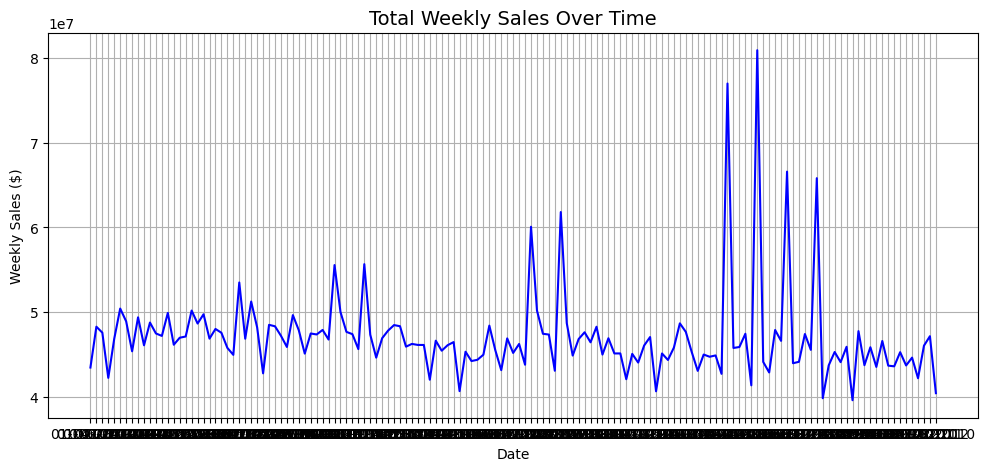

In [6]:
# ------------- STEP 6: SALES TREND OVER TIME -------------
plt.figure(figsize=(12,5))
weekly_sales_over_time = df.groupby('Date')['Weekly_Sales'].sum()
plt.plot(weekly_sales_over_time, color='blue')
plt.title('Total Weekly Sales Over Time', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Weekly Sales ($)')
plt.grid(True)
plt.show()

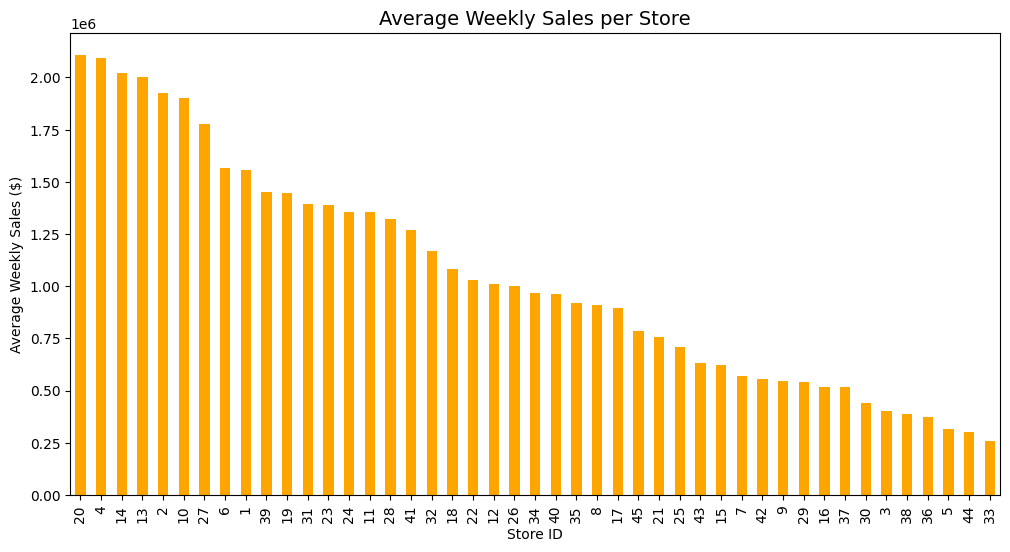

In [8]:
# ------------- STEP 7: AVERAGE SALES BY STORE -------------
store_avg_sales = df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
store_avg_sales.plot(kind='bar', color='orange')
plt.title('Average Weekly Sales per Store', fontsize=14)
plt.xlabel('Store ID')
plt.ylabel('Average Weekly Sales ($)')
plt.show()

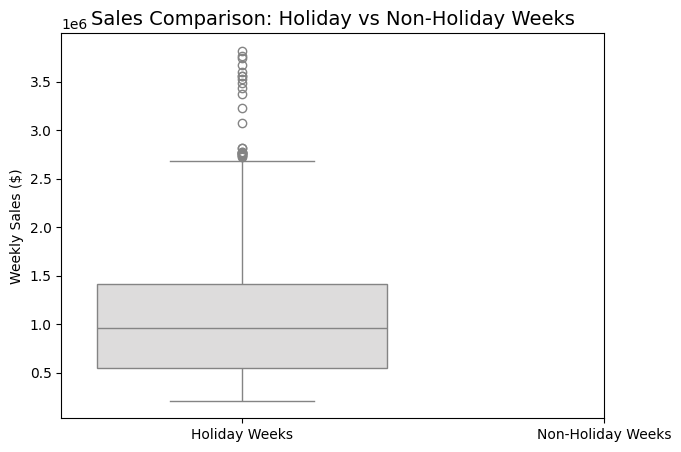

Average Holiday Week Sales: 1122887.8923555557
Average Non-Holiday Week Sales: 1041256.3802088555


In [7]:
# ------------- STEP 8: HOLIDAY vs NON-HOLIDAY SALES -------------
holiday_sales = df[df['Holiday_Flag'] == 1]['Weekly_Sales']
non_holiday_sales = df[df['Holiday_Flag'] == 0]['Weekly_Sales']

plt.figure(figsize=(7,5))
sns.boxplot(data=[holiday_sales, non_holiday_sales], palette='coolwarm')
plt.xticks([0,1], ['Holiday Weeks', 'Non-Holiday Weeks'])
plt.title('Sales Comparison: Holiday vs Non-Holiday Weeks', fontsize=14)
plt.ylabel('Weekly Sales ($)')
plt.show()

print("Average Holiday Week Sales:", holiday_sales.mean())
print("Average Non-Holiday Week Sales:", non_holiday_sales.mean())

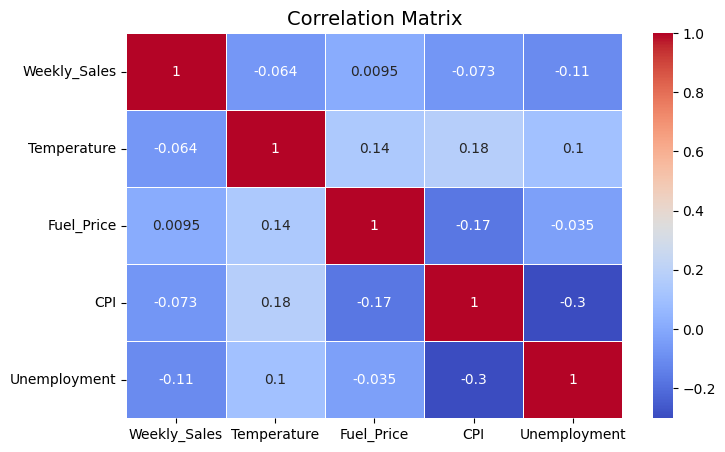

In [8]:

# ------------- STEP 9: CORRELATION ANALYSIS -------------
plt.figure(figsize=(8,5))
corr = df[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

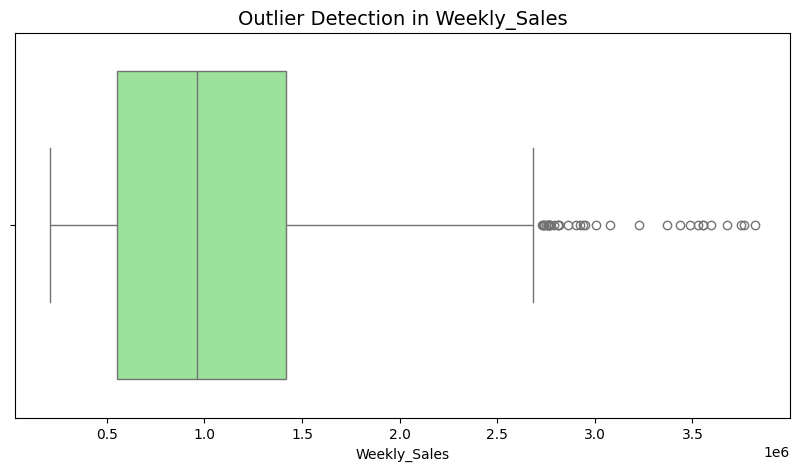

In [30]:
# ------------- STEP 10: OUTLIER DETECTION -------------
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Weekly_Sales'], color='lightgreen')
plt.title('Outlier Detection in Weekly_Sales', fontsize=14)
plt.show()

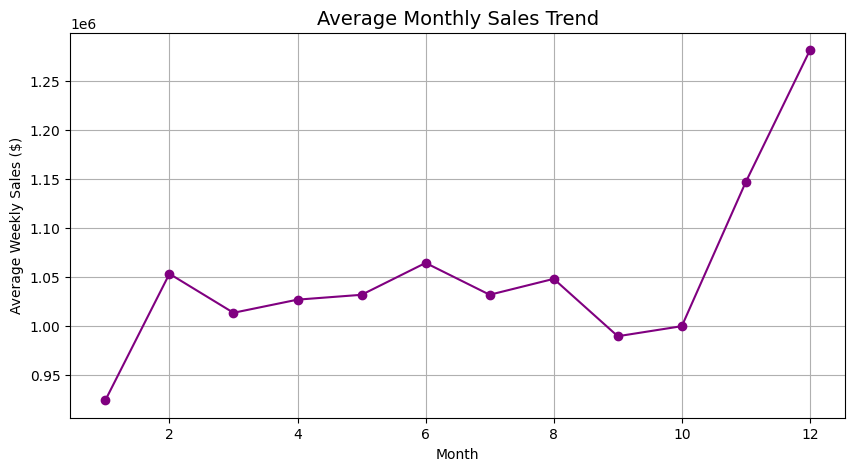

In [14]:

# ------------- STEP 11: YEARLY / MONTHLY ANALYSIS -------------

# Extract Year and Month from datetime column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Monthly average sales
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean()

# Plot monthly trend
plt.figure(figsize=(10,5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='purple')
plt.title('Average Monthly Sales Trend', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales ($)')
plt.grid(True)
plt.show()

# Insight:
# Helps understand seasonal patterns, like higher sales during year-end or summer months.

In [32]:
# ------------- STEP 12: SUMMARY INSIGHTS -------------
print("✅ EDA SUMMARY INSIGHTS:")
print("------------------------------------------------")
print(f"1. Total Records: {len(df)} | Stores: {df['Store'].nunique()}")
print(f"2. Holiday Weeks: {df['Holiday_Flag'].sum()} ({round((df['Holiday_Flag'].sum()/len(df))*100,2)}%)")
print(f"3. Avg Weekly Sales: ${df['Weekly_Sales'].mean():,.2f}")
print(f"4. Highest Average Store Sales: ${store_avg_sales.max():,.2f} | Lowest: ${store_avg_sales.min():,.2f}")
print("5. Holiday weeks show higher average sales, confirming seasonal impact.")
print("6. No missing data or duplicates detected.")
print("7. Further analysis can focus on forecasting or regional trends.")

✅ EDA SUMMARY INSIGHTS:
------------------------------------------------
1. Total Records: 6435 | Stores: 45
2. Holiday Weeks: 450 (6.99%)
3. Avg Weekly Sales: $1,046,964.88
4. Highest Average Store Sales: $2,107,676.87 | Lowest: $259,861.69
5. Holiday weeks show higher average sales, confirming seasonal impact.
6. No missing data or duplicates detected.
7. Further analysis can focus on forecasting or regional trends.


### 🔍 Deeper EDA Insights

- **Sales over time** show visible peaks — likely during holidays.
- **Store-wise averages** identify high-performing stores.
- **Holiday vs Non-Holiday comparison**: holiday weeks generally produce higher weekly sales.
- **Correlation matrix**:
  - Weekly_Sales shows mild relationships with economic indicators (CPI, Unemployment).
  - Temperature shows slight negative relation (extreme weather may reduce shopping).
- **Outliers** detected — possibly major promotions or events.
- **Monthly trend**: noticeable sales increase during year-end months.

Overall, Walmart’s sales are **seasonal, economically influenced, and vary significantly across stores**.


In [15]:
# ============================================================
# 🧪 STEP 13: HYPOTHESIS TESTING — Holiday vs Non-Holiday Sales
# ============================================================

from scipy import stats

# Separate the two groups
holiday_sales = df[df['Holiday_Flag'] == 1]['Weekly_Sales']
non_holiday_sales = df[df['Holiday_Flag'] == 0]['Weekly_Sales']

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(holiday_sales, non_holiday_sales, equal_var=False)

print("T-statistic:", round(t_stat, 3))
print("P-value:", round(p_value, 5))

# Decision rule
alpha = 0.05  # 95% confidence level
if p_value < alpha:
    print("\n✅ Reject Null Hypothesis: Holiday sales are significantly higher than non-holiday sales.")
else:
    print("\n❌ Fail to Reject Null Hypothesis: No significant difference between holiday and non-holiday sales.")


T-statistic: 2.68
P-value: 0.0076

✅ Reject Null Hypothesis: Holiday sales are significantly higher than non-holiday sales.


## 🧪 Hypothesis Testing: Holiday vs Non-Holiday Sales

### 🎯 Objective
To determine whether Walmart’s average **weekly sales** are significantly higher during **holiday weeks** compared to **non-holiday weeks**.

---

### 🧩 Hypotheses

- **Null Hypothesis (H₀):**  
  There is **no difference** between holiday and non-holiday weekly sales.  

- **Alternative Hypothesis (H₁):**  
  **Holiday weekly sales are higher** than non-holiday weekly sales.

---

### ⚙️ Test Used
**Independent Two-Sample T-Test**

- **T-statistic:** 2.68  
- **P-value:** 0.0076  

---

### 📏 Decision Rule
If **p-value < 0.05 → Reject H₀**

✅ **Result:**  
Since the p-value (0.0076) is less than 0.05, we **reject the null hypothesis**.

---

### 📊 Conclusion
Holiday weeks have **significantly higher average weekly sales** than non-holiday weeks.  
This confirms that **holiday seasons drive substantial revenue growth** for Walmart, as also observed in the boxplot visualization.

---

### 💼 Business Insight
Walmart should **strengthen marketing and promotional campaigns** during holiday seasons to **maximize profit opportunities** and capitalize on peak customer spending periods.


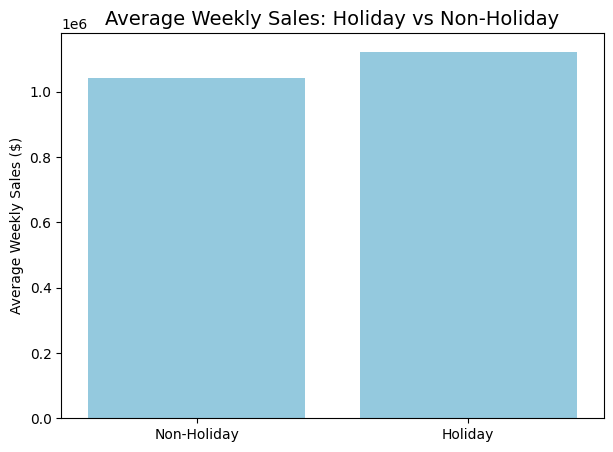

In [16]:
plt.figure(figsize=(7,5))
sns.barplot(x=['Non-Holiday', 'Holiday'], 
            y=[non_holiday_sales.mean(), holiday_sales.mean()],
            color='skyblue')
plt.title('Average Weekly Sales: Holiday vs Non-Holiday', fontsize=14)
plt.ylabel('Average Weekly Sales ($)')
plt.show()